In [1]:
import sys
import os
qprc_path = os.path.abspath(os.path.join('..'))
if qprc_path not in sys.path:
    sys.path.append(qprc_path)

# A Support Fuzzy-sets Machine, i.e., a SVM with kernel on fuzzy sets

This notebook contains:
* A data fuzzification procedure
* kernel on fuzzy sets estimation via the cross-product kernel in fuzzy sets
* experimental validation with a SVM

## Iris dataset

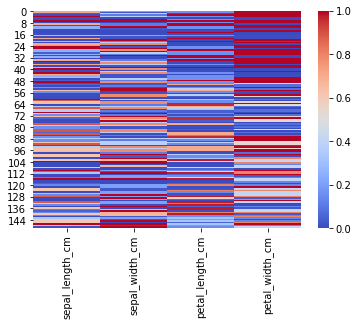

In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
import seaborn as sns
from  kernelfuzzy.fuzzyset import FuzzySet
from  kernelfuzzy.fuzzification import FuzzyData

#from https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset/46379878#46379878
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

#data to pandas dataframe
iris_data = sklearn_to_df(load_iris())
iris_data.head()

#data fuzzification 
iris_fuzzy_data = FuzzyData(data=iris_data, target='target')
iris_fuzzy_data.quantile_fuzzification_classification()

#printing epistemic values given my the membsership degrees of the values of the dataset
ax = sns.heatmap(iris_fuzzy_data.get_epistemic_values(), cmap="coolwarm")

## Kernel Matrices of the fuzzified version of the Iris dataset

In [ ]:
#kernel gram matrix
from sklearn.metrics.pairwise import rbf_kernel, linear_kernel
from kernelfuzzy.kernels import cross_product_kernel, gram_matrix_cross_product_kernel
import matplotlib.pyplot as plt

kernel_bandwidth = [0.05, 0.5, 5, 50]

fig, axn = plt.subplots(2, 2,figsize=(10,10))
for i, ax in enumerate(axn.flat):
    K = gram_matrix_cross_product_kernel(iris_fuzzy_data.get_fuzzydata(),
                                   iris_fuzzy_data.get_fuzzydata(),
                                   rbf_kernel,kernel_bandwidth[i],
                                   linear_kernel,'')
    sns.heatmap(K, ax=ax)
fig.tight_layout()

## A Support fuzzy-set Machine

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = iris_fuzzy_data.get_fuzzydata()
y = iris_fuzzy_data.get_target()

from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
rs.get_n_splits(X)

acc = []
for train_index, test_index in rs.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    
    svc_p = SVC(kernel='precomputed')
    
    #training
    K_train = gram_matrix_cross_product_kernel(X_train,
                                               X_train,
                                               rbf_kernel,50,
                                               rbf_kernel,50)
    sns.heatmap(K_train)
    plt.show()
    svc_p.fit(K_train,y_train)
    
    #testing
    K_test = gram_matrix_cross_product_kernel(X_test,
                                              X_train,
                                              rbf_kernel,50,
                                              rbf_kernel,50)
    
    sns.heatmap(K_test)
    plt.show()

    y_pred=svc_p.predict(K_test)
    acc_test = accuracy_score(y_test, y_pred)
    acc.append(acc_test)
    print("Test accuracy: {}".format(acc_test))
    
print("Results: mean: ", np.mean(acc)," std: ", np.std(acc))

NameError: name 'iris_fuzzy_data' is not defined